In [39]:
#import libraries
#!pip install pandas-datareader
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from IPython.display import Image
import numpy as np
import pandas_datareader as web
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics  
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import math


In [40]:
#List of all relevant tickers on the S n P 500
Tickers = ["MMM" , "AOS" , "ABT" , "ABBV" , "ABMD" , "ACN" , "ATVI" , "ADBE" , "AAP" , "AMD" , "AES" , "AFL" , "A" , "APD" , "AKAM" , "ALK" , "ALB" , "ARE" , "ALXN" , "ALGN" , "ALLE" , "LNT" , "ALL" , "GOOGL" , "GOOG" , "MO" , "AMZN" , "AMCR" , "AEE" , "AAL" , "AEP" , "AXP" , "AIG" , "AMT" , "AWK" , "AMP" , "ABC" , "AME" , "AMGN" , "APH" , "ADI" , "ANSS" , "ANTM" , "AON" , "APA" , "AIV" , "AAPL" , "AMAT" , "APTV" , "ADM" , "ANET" , "AJG" , "AIZ" , "T" , "ATO" , "ADSK" , "ADP" , "AZO" , "AVB" , "AVY" , "BKR" , "BLL" , "BAC" , "BAX" , "BDX" ,  "BBY" , "BIO" , "BIIB" , "BLK" , "BA" , "BKNG" , "BWA" , "BXP" , "BSX" , "BMY" , "AVGO" , "BR" ,  "CHRW" , "COG" , "CDNS" , "CPB" , "COF" , "CAH" , "KMX" , "CCL" , "CARR" , "CAT" , "CBOE" , "CBRE" , "CDW" , "CE" , "CNC" , "CNP" , "CERN" , "CF" , "SCHW" , "CHTR" , "CVX" , "CMG" , "CB" , "CHD" , "CI" , "CINF" , "CTAS" , "CSCO" , "C" , "CFG" , "CTXS" , "CME" , "CMS" , "KO" , "CTSH" , "CL" , "CMCSA" , "CMA" , "CAG" , "COP" , "ED" , "STZ" , "CPRT" , "GLW" , "CTVA" , "COST" , "COTY" , "CCI" , "CSX" , "CMI" , "CVS" , "DHI" , "DHR" , "DRI" , "DVA" , "DE" , "DAL" , "XRAY" , "DVN" , "DXCM" , "FANG" , "DLR" , "DFS" , "DISCA" , "DISCK" , "DISH" , "DG" , "DLTR" , "D" , "DPZ" , "DOV" , "DOW" , "DTE" , "DUK" , "DRE" , "DD" , "DXC" , "EMN" , "ETN" , "EBAY" , "ECL" , "EIX" , "EW" , "EA" , "EMR" , "ETR" , "EOG" , "EFX" , "EQIX" , "EQR" , "ESS" , "EL" , "RE" , "EVRG" , "ES" , "EXC" , "EXPE" , "EXPD" , "EXR" , "XOM" , "FFIV" , "FB" , "FAST" , "FRT" , "FDX" , "FIS" , "FITB" , "FRC" , "FE" , "FISV" , "FLT" , "FLIR" , "FLS" , "FMC" , "F" , "FTNT" , "FTV" , "FBHS" , "FOXA" , "FOX" , "BEN" , "FCX" , "GPS" , "GRMN" , "IT" , "GD" , "GE" , "GIS" , "GM" , "GPC" , "GILD" , "GPN" , "GL" , "GS" , "GWW" , "HRB" , "HAL" , "HBI" , "HIG" , "HAS" , "HCA" , "PEAK" , "HSIC" , "HES" , "HPE" , "HLT" , "HFC" , "HOLX" , "HD" , "HON" , "HRL" , "HST" , "HWM" , "HPQ" , "HUM" , "HBAN" , "HII" , "IEX" , "IDXX" , "INFO" , "ITW" , "ILMN" , "INCY" , "IR" , "INTC" , "ICE" , "IBM" , "IFF" , "IP" , "IPG" , "INTU" , "ISRG" , "IVZ" , "IPGP" , "IQV" , "IRM" , "JBHT" , "JKHY" , "J" , "SJM" , "JNJ" , "JCI" , "JPM" , "JNPR" , "KSU" , "K" , "KEY" , "KEYS" , "KMB" , "KIM" , "KMI" , "KLAC" , "KSS" , "KHC" , "KR" , "LB" , "LHX" , "LH" , "LRCX" , "LW" , "LVS" , "LEG" , "LDOS" , "LEN" , "LLY" , "LNC" , "LIN" , "LYV" , "LKQ" , "LMT" , "L" , "LOW" , "LYB" , "MTB" , "MRO" , "MPC" , "MKTX" , "MAR" , "MMC" , "MLM" , "MAS" , "MA" , "MXIM" , "MKC" , "MCD" , "MCK" , "MDT" , "MRK" , "MET" , "MTD" , "MGM" , "MCHP" , "MU" , "MSFT" , "MAA" , "MHK" , "TAP" , "MDLZ" , "MNST" , "MCO" , "MS" , "MSI" , "MSCI" , "NDAQ" , "NOV" , "NTAP" , "NFLX" , "NWL" , "NEM" , "NWSA" , "NWS" , "NEE" , "NLSN" , "NKE" , "NI" , "NSC" , "NTRS" , "NOC" , "NLOK" , "NCLH" , "NRG" , "NUE" , "NVDA" , "NVR" , "ORLY" , "OXY" , "ODFL" , "OMC" , "OKE" , "ORCL" , "OTIS" , "PCAR" , "PKG" , "PH" , "PAYX" , "PAYC" , "PYPL" , "PNR" , "PBCT" , "PEP" , "PKI" , "PRGO" , "PFE" , "PM" , "PSX" , "PNW" , "PXD" , "PNC" , "PPG" , "PPL" , "PFG" , "PG" , "PGR" , "PLD" , "PRU" , "PEG" , "PSA" , "PHM" , "PVH" , "QRVO" , "QCOM" , "PWR" , "DGX" , "RL" , "RJF" , "RTX" , "O" , "REG" , "REGN" , "RF" , "RSG" , "RMD" , "RHI" , "ROK" , "ROL" , "ROP" , "ROST" , "RCL" , "SPGI" , "CRM" , "SBAC" , "SLB" , "STX" , "SEE" , "SRE" , "NOW" , "SHW" , "SPG" , "SWKS" , "SLG" , "SNA" , "SO" , "LUV" , "SWK" , "SBUX" , "STT" , "STE" , "SYK" , "SIVB" , "SYF" , "SNPS" , "SYY" , "TMUS" , "TROW" , "TTWO" , "TPR" , "TGT" , "TEL" , "FTI" , "TDY" , "TFX" , "TXN" , "TXT" , "BK" , "CLX" , "COO" , "HSY" , "MOS" , "TRV" , "DIS" , "TMO" , "TJX" , "TSCO" , "TT" , "TDG" , "TFC" , "TWTR" , "TYL" , "TSN" , "USB" , "UDR" , "ULTA" , "UAA" , "UA" , "UNP" , "UAL" , "UNH" , "UPS" , "URI" , "UHS" , "UNM" , "VLO" , "VAR" , "VTR" , "VRSN" , "VRSK" , "VZ" , "VRTX" , "VFC" , "VIAC" , "V" , "VNO" , "VMC" , "WRB" , "WAB" , "WBA" , "WMT" , "WM" , "WAT" , "WEC" , "WFC" , "WELL" , "WST" , "WDC" , "WU" , "WRK" , "WY" , "WHR" , "WMB" , "WLTW" , "WYNN" , "XEL" , "XRX" , "XLNX" , "XYL" , "YUM" , "ZBRA" , "ZBH" , "ZION" , "ZTS"]

In [41]:
##workin
#Using the full features dataset, the closing prices; we are able to fit a line over a specified time period
def price_forecast(fullfeatures_df, close, time, lookback, frontal, stock_num):
  
  #PCA
  pca_one = PCA(n_components = 5)#training
  pca_two = PCA(n_components = 5)#testing


  #Training data = t - frontal - lookback
  x_training = fullfeatures_df[time-frontal-lookback:time-frontal,:]
  x_training = MinMaxScaler().fit_transform(x_training)
  x_training = pca_one.fit_transform(x_training)
  y_training = close.iloc[time-frontal+1:time+1,stock_num]

  #Testing = t - lookback
  x_testing = fullfeatures_df[time-lookback:time,:]
  x_testing = MinMaxScaler().fit_transform(x_testing)
  x_testing = pca_two.fit_transform(x_testing)
  y_testing = close.iloc[time+1 : time+frontal+1, stock_num]

  RF = RandomForestRegressor(n_estimators=10,min_samples_leaf=10, max_depth=5, max_features=5, min_samples_split=5, bootstrap = True, criterion='mse')#n_estimators=15, bootstrap=True, 
  RF.fit(x_training, y_training)
  predicted = RF.predict(x_testing)
  
  return predicted, y_testing

In [42]:
#comparisonn set up between actual and predicted.....
def prediction_tabulator(full_features_df,closing_prices_df):
  predictions = []
  actuals = [] 
  
  for stocks in range(closing_prices_df.shape[1]):
    stock_predictions = []
    stock_actuals = []
    
    for dates in range(60, df_closing.shape[0], 30): 
      pred, act = price_forecast(full_features_df, closing_prices_df, dates, 30, 30, stocks)
      stock_predictions.append(pred)
      stock_actuals.append(act)
    
    stock_predictions = np.concatenate(stock_predictions)
    stock_actuals = np.concatenate(stock_actuals)

    predictions.append(stock_predictions)
    actuals.append(stock_actuals)

  return predictions, actuals

In [43]:
#Mean Returns function
def mean_returns(df, length): 
  mu = df.sum(axis = 0)/length
  return mu

In [44]:
from datetime import timedelta
from dateutil.parser import parse

def datetime_parser(date, delta):
    m, y = (date.month+delta) % 12, date.year + ((date.month)+delta-1) // 12
    if not m: m = 12
    d = min(date.day, [31,
        29 if y%4==0 and not y%400==0 else 28,31,30,31,30,31,31,30,31,30,31][m-1])
    new_date = (date.replace(day=d,month=m, year=y))
    return parse(new_date.strftime('%Y-%m-%d'))





In [ ]:
#This part of the code takes in a dataset and splits it into datasets w/ lookback months and frontal looking months
def data_splitter (dataframe, lookback, horizon,
                    step, cummulative = False):

#takes pandas dataframe with DatetimeIndex

    if cummulative:
        c = lookback
        step = horizon
        
    initial = min(dataframe.index)
    windows = []
    horizons = []

    while initial <= datetime_parser(max(dataframe.index), -lookback):
        windowBegin = initial
        windowEnd = datetime_parser(windowBegin, lookback)
        if cummulative:
            windowBegin = min(dataframe.index)
            windowEnd = datetime_parser(windowBegin, c) + timedelta(days=1)
            c += horizon
        horizonBegin = windowEnd + timedelta(days=1)
        horizonEnd = datetime_parser(horizonBegin, horizon)

        lookbackWindow = dataframe[windowBegin:windowEnd]
        horizonWindow = dataframe[horizonBegin:horizonEnd]

        windows.append(lookbackWindow)
        horizons.append(horizonWindow)

        initial = datetime_parser(initial, step)

    return windows, horizons

In [45]:
from scipy.optimize import minimize, Bounds, LinearConstraint
from numpy.linalg import norm

def actual_return(actual_returns, w):
  actual_returns = actual_returns 
  mean_return = mean_returns(actual_returns, actual_returns.shape[0])
  actual_covariance = actual_returns.cov()

  portfolio_returns = mean_return.T.dot(w)
  portfolio_variance = w.T.dot(actual_covariance).dot(w)
  return portfolio_returns, portfolio_variance



In [ ]:
def meanvariance_optimizer(predicted_returns, actual_returns):
  mean_return = mean_returns(predicted_returns, predicted_returns.shape[0])
  predicted_covariance = predicted_returns.cov()#497x497
  actual_covariance = actual_returns.cov()
  error = actual_returns - predicted_returns
  #error = predicted_returns - actual_returns
  mean_errors = mean_error(error, error.shape[0])
  #print(mean_return)
  #print(mean_error)
   

  
  #Cost Function
  def f(w):
    return (w.T.dot(actual_covariance).dot(w) - mean_return.T.dot(w) - mean_errors.T.dot(w))#.T.dot(w))
  #out custom maximises 

  #Bounds of Weights
  opt_bounds = Bounds(0, 1)

  #Equality Constraints
  def h(w):
    return sum(w) - 1

  #Constraints Dictionary
  cons = ({
      'type' : 'eq',
      'fun' : lambda w: h(w)
  })

  #Solver
  sol = minimize(f,
                  x0 = np.ones(mean_return.shape[0]),
                  constraints = cons,
                  bounds = opt_bounds,
                  options = {'disp': False})
                  #tol=10e-10)


  #Predicted Results
  w = sol.x
  predicted_portfolio_returns = w.dot(mean_return)
  portfolio_STD = w.T.dot(predicted_covariance).dot(w)
  
  #Actual Results
  portfolio_actual_returns, portfolio_actual_variance = actual_return(actual_returns, w)
  sharpe_ratio = portfolio_actual_returns/np.std(portfolio_actual_variance)

  ret_dict = {'weights' : w,
              'predicted_returns' : predicted_portfolio_returns,
              'predicted_variance' : portfolio_STD,
              'actual_returns' : portfolio_actual_returns,
              'actual_variance' : portfolio_actual_variance,
              'sharpe_ratio': sharpe_ratio}
  return ret_dict 


In [46]:
#Sharpe calculator
def metrics_vol(returns): 
  stdev = returns.std() 
  annualized_vol = stdev.item() / math.sqrt(252)

  return annualized_vol

In [47]:
#Standard deviation calculator
def metrics_sharpe(returns): 
  sharpe = returns.mean() / returns.std()
  annualized_sharpe = sharpe.item() / math.sqrt(252)

  return annualized_sharpe

In [48]:
def mean_error(df, length): 
  mu = df.sum(axis = 0)/length
  return mu

In [49]:
df = pd.read_csv('StockPrices_SnP500_Final.csv')
df['Date']= pd.to_datetime(df['Date'], errors='coerce')

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
#Randomly pick N number of stocks to be put in the portfolio
portfolio_count = 0

Equity_perportfolio = []

Portfolio_sequence = []

MSE_values = []

RMSE_values = []

MAE_values = []

Turnover_values = []

Excessreturn_vals = []

Sharpe_vals = []

standarddev_vals = []  

Optimization_error = []
while portfolio_count < 500:
  df = pd.read_csv('StockPrices_SnP500_Final.csv')
#convert to date format.
  df['Date']= pd.to_datetime(df['Date'], errors='coerce')

# declaring list
  list = Tickers
  portfolio_count = portfolio_count + 1
# initializing the value of n (Number of assets in portfolio)
  n = 5
  
# printing n elements from list (add number while printing the potential portfolio)
  potential_portfolio = random.sample(list, n)
  print("=================================================")
  print("Portfolio number", portfolio_count)
  print("-------------------------------------------------")
  print("Assets:", potential_portfolio)
  print("=================================================")
  asset_one = potential_portfolio[0]
  asset_two = potential_portfolio[1]
  asset_three = potential_portfolio[2]
  asset_four = potential_portfolio[3]
  asset_five = potential_portfolio[4]

  asset_one = df.loc[df['Index'] == asset_one]
  asset_two = df.loc[df['Index'] == asset_two]
  asset_three = df.loc[df['Index'] == asset_three]
  asset_four = df.loc[df['Index'] == asset_four]
  asset_five = df.loc[df['Index'] == asset_five]

  assets = asset_one.append(asset_two, ignore_index=True).append(asset_three, ignore_index=True).append(asset_four, ignore_index=True).append(asset_five, ignore_index=True)

  df_closing = assets[['Date', 'Index', 'Close']] 
  assets = assets.drop(columns = ['Unnamed: 0','Close'])
  df = assets 
  df = df.pivot_table(index = 'Date', columns = 'Index').dropna(axis = 1) #dropna = True)#.dropna(axis=0)
  df = df.swaplevel(axis=1).sort_index(axis=1)

  df_closing = df_closing.pivot_table(index = 'Date', columns = 'Index', values='Close').dropna(axis=1) #dropna = True)#.dropna(axis=0)
  np.seterr(divide = 'ignore') 
  fullfeatures_df = df.dropna(axis = 1)
  fullfeatures_df = fullfeatures_df.to_numpy()
 
  dates = df_closing.index
  stocks = df_closing.columns
  
  #making predictions
  pred, act = prediction_tabulator(fullfeatures_df, df_closing)
  #dframe for predictions and actuals
  
  # Need to get rid of 60 days for initial prediction window
  final_actuals = pd.DataFrame(data = act, index=stocks, columns = dates[61:]).transpose()#61
  final_preds = pd.DataFrame(data = pred, index = stocks).transpose() #Trim because it predicts extra dates into future
  
  loc_point = len(final_actuals)
  final_preds = final_preds.iloc[:loc_point,:]
  final_preds.index = dates[61:]
    
  #Portfolio Optimization
  RF_Predicted_Returns = final_preds
  RF_Actual_Returns = final_actuals
  
  RF_Predicted_Returns = RF_Predicted_Returns.apply(lambda x: np.log(x) - np.log(x.shift(1))).iloc[1:] 
  RF_Actual_Returns = RF_Actual_Returns.apply(lambda x: np.log(x) - np.log(x.shift(1))).iloc[1:] 
  
  from sklearn.metrics import mean_squared_error, mean_absolute_error

  #with false, rmse
  rmse = mean_squared_error(RF_Actual_Returns, RF_Predicted_Returns, squared=False)
  RMSE_values.append(rmse)

  #with false, rmse
  mse = mean_squared_error(RF_Actual_Returns, RF_Predicted_Returns)
  MSE_values.append(mse)

  mae = mean_absolute_error(RF_Actual_Returns, RF_Predicted_Returns)
  MAE_values.append(mae)
  #print(mse)

  RF_pred_windows, RF_pred_horizons = data_splitter(RF_Predicted_Returns , 12, 1, 1) #12----6
  RF_act_windows, RF_act_horizons = data_splitter(RF_Actual_Returns, 12, 1, 1)      #12----6
  
  RF_scipy_returns= []
  RF_scipy_variance = []
  RF_scipy_SR = []
  weights = []
  RF_scipy_predret = []

  #Testing on 5 years of data
  for i in range(len(RF_act_horizons)-72,len(RF_act_horizons)-12):#72 n 12
    #Scipy optimize results
    scipy = meanvariance_optimizer(RF_pred_horizons[i], RF_act_horizons[i])#, .5, 2)
    weights.append(scipy['weights'])
    RF_scipy_returns.append(scipy['actual_returns'])
    RF_scipy_variance.append(scipy['actual_variance'])
    RF_scipy_SR.append(scipy['sharpe_ratio'])
    RF_scipy_predret.append(scipy['predicted_returns'])
  
  Turnover = sum(weights)
  timestamps = [] #'predicted_returns' : predicted_portfolio_returns,
  for i in range(len(RF_act_horizons)-72,len(RF_act_horizons)-12):
    #print(RF_act_horizons[i].shape)#no of print statements=range
    time = RF_act_horizons[i].index[-1]#-1
    timestamps.append(time)
  
  RF_Portfolio_Returns = pd.DataFrame(data = np.array([RF_scipy_returns,RF_scipy_variance,RF_scipy_SR,RF_scipy_predret,np.array(RF_scipy_returns) - np.array(RF_scipy_predret)]).T, columns = ['Returns', 'Variance', 'Sharpe Ratio', 'Predicted Return', 'Excess Returns'], index=timestamps)
  RF_Portfolio_Returns.head()  
  RF_equity = [100]
  RF_predicted_equity = [100]

  #Test how much the portfolio grows
  for i in range(1,60):
    RF_equity.append(RF_equity[i-1]* math.exp(RF_scipy_returns[i]))
    RF_predicted_equity.append(RF_predicted_equity[i-1]* math.exp(RF_scipy_predret[i]))  
  
  Excess_return = (RF_equity[-1] - RF_predicted_equity[-1])/RF_predicted_equity[-1]
  Information_ratio = (Excess_return)/np.std(Excess_return)
  Equity_unitweight = 100/(sum(Turnover))
  
  print("Portfolio Ending Equity: " , RF_equity[-1])
  print("Portfolio Predicted Ending Equity: " , RF_predicted_equity[-1])
  print("Portfolio Excess Return: " , Excess_return,"%")
  print("Portfolio Information Ratio: " ,Information_ratio)
  print("Portfolio proportions: " , Turnover)
  
  if len(Turnover) >= 5:
    print("Proportion per 100$USD Asset 1: " , Turnover[0]*(Equity_unitweight),"$USD")  
    print("Proportion per 100$USD Asset 2: " , Turnover[1]*(Equity_unitweight),"$USD")
    print("Proportion per 100$USD Asset 3: " , Turnover[2]*(Equity_unitweight),"$USD")
    print("Proportion per 100$USD Asset 4: " , Turnover[3]*(Equity_unitweight),"$USD")
    print("Proportion per 100$USD Asset 5: " , Turnover[4]*(Equity_unitweight),"$USD")
  
  elif len(Turnover) == 4:
    print("Proportion per 100$USD Asset 1: " , Turnover[0]*(Equity_unitweight),"$USD")  
    print("Proportion per 100$USD Asset 2: " , Turnover[1]*(Equity_unitweight),"$USD")
    print("Proportion per 100$USD Asset 3: " , Turnover[2]*(Equity_unitweight),"$USD")
    print("Proportion per 100$USD Asset 4: " , Turnover[3]*(Equity_unitweight),"$USD")
  
  elif len(Turnover) == 3:
    print("Proportion per 100$USD Asset 1: " , Turnover[0]*(Equity_unitweight),"$USD")  
    print("Proportion per 100$USD Asset 2: " , Turnover[1]*(Equity_unitweight),"$USD")
    print("Proportion per 100$USD Asset 3: " , Turnover[2]*(Equity_unitweight),"$USD")

  elif len(Turnover) == 2:
    print("Proportion per 100$USD Asset 1: " , Turnover[0]*(Equity_unitweight),"$USD")  
    print("Proportion per 100$USD Asset 2: " , Turnover[1]*(Equity_unitweight),"$USD")
  
  
  else:
    print("Proportion per 100$USD Asset 1: " , Turnover[0]*(Equity_unitweight),"$USD")  
    
  #info for RANDOM FOREST 
  Equity_perportfolio.append(RF_equity[-1])
  Portfolio_sequence.append(potential_portfolio)
 
  Turnover_values.append(Turnover)
  Excessreturn_vals.append(Excess_return)
 
  Sharpe_vals.append(metrics_vol(np.array(RF_scipy_returns)))
  standarddev_vals.append(metrics_vol(np.array(RF_scipy_returns)))  
  #Scipy accuracy
  Optimization_error.append(mean_squared_error( RF_scipy_returns, RF_scipy_predret))

 

Portfolio number 1
-------------------------------------------------
Assets: ['ODFL', 'PG', 'DVA', 'EMR', 'WEC']
Portfolio Ending Equity:  119.14765550459656
Portfolio Predicted Ending Equity:  102.1018851452904
Portfolio Excess Return:  0.1669486350330371 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 8.96315926  9.33934261 20.2973567   8.40276616 12.99737527]
Proportion per 100$USD Asset 1:  14.938598771093005 $USD
Proportion per 100$USD Asset 2:  15.565571013073743 $USD
Proportion per 100$USD Asset 3:  33.82892782839305 $USD
Proportion per 100$USD Asset 4:  14.004610267018963 $USD
Proportion per 100$USD Asset 5:  21.662292120421235 $USD
Portfolio number 2
-------------------------------------------------
Assets: ['IQV', 'ECL', 'WST', 'USB', 'AEE']
Portfolio Ending Equity:  113.8087309961361
Portfolio Predicted Ending Equity:  102.94569342465785
Portfolio Excess Return:  0.1055220204954811 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [15.96188954 11.1843

Portfolio Ending Equity:  125.23609621873658
Portfolio Predicted Ending Equity:  103.27808287901277
Portfolio Excess Return:  0.21261058229989582 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [15.58941105  6.75756678 14.07781689 14.68419224  8.89101304]
Proportion per 100$USD Asset 1:  25.98235175756108 $USD
Proportion per 100$USD Asset 2:  11.26261129771135 $USD
Proportion per 100$USD Asset 3:  23.463028152100907 $USD
Proportion per 100$USD Asset 4:  24.473653729106406 $USD
Proportion per 100$USD Asset 5:  14.818355063520254 $USD
Portfolio number 13
-------------------------------------------------
Assets: ['ZION', 'MRK', 'APD', 'MCO', 'VMC']
Portfolio Ending Equity:  119.95997698670581
Portfolio Predicted Ending Equity:  103.15651071388359
Portfolio Excess Return:  0.1628929299424305 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 6.87060605 14.83157903 11.64109352 14.19941941 12.45730199]
Proportion per 100$USD Asset 1:  11.451010089501942 $USD
Proportion

Portfolio number 24
-------------------------------------------------
Assets: ['HSIC', 'AMCR', 'DISCA', 'CAT', 'ABMD']
Portfolio Ending Equity:  123.86444791181984
Portfolio Predicted Ending Equity:  102.35810876347975
Portfolio Excess Return:  0.21010879751632647 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [19.32922791  7.86545289 10.24785836 13.62552389  8.93193695]
Proportion per 100$USD Asset 1:  32.215379843947986 $USD
Proportion per 100$USD Asset 2:  13.109088153130102 $USD
Proportion per 100$USD Asset 3:  17.079763938845428 $USD
Proportion per 100$USD Asset 4:  22.70920647915878 $USD
Proportion per 100$USD Asset 5:  14.886561584917702 $USD
Portfolio number 25
-------------------------------------------------
Assets: ['UNH', 'HUM', 'ROK', 'LB', 'AMT']
Portfolio Ending Equity:  122.55233555488518
Portfolio Predicted Ending Equity:  102.24056068510106
Portfolio Excess Return:  0.1986665050903231 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [16.7225984

Portfolio Ending Equity:  122.23990123595445
Portfolio Predicted Ending Equity:  99.51120523281911
Portfolio Excess Return:  0.22840338381952735 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 9.93149938  6.89221443  8.36457476 20.65260632 14.1591051 ]
Proportion per 100$USD Asset 1:  16.552498970466402 $USD
Proportion per 100$USD Asset 2:  11.487024054243836 $USD
Proportion per 100$USD Asset 3:  13.940957940577473 $USD
Proportion per 100$USD Asset 4:  34.421010539429446 $USD
Proportion per 100$USD Asset 5:  23.598508495282843 $USD
Portfolio number 36
-------------------------------------------------
Assets: ['SWKS', 'CBRE', 'LYV', 'SEE', 'LLY']
Portfolio Ending Equity:  121.82349077908961
Portfolio Predicted Ending Equity:  101.55230627561099
Portfolio Excess Return:  0.1996132362416568 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 9.33142224 15.72792412 14.19081737  8.77309807 11.9767382 ]
Proportion per 100$USD Asset 1:  15.552370395083628 $USD
Proporti

Portfolio Ending Equity:  126.04394748511496
Portfolio Predicted Ending Equity:  101.58184203332551
Portfolio Excess Return:  0.24081179236505934 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [11.88732986 12.34538414 12.30089598  8.28773292 15.1786571 ]
Proportion per 100$USD Asset 1:  19.812216430940715 $USD
Proportion per 100$USD Asset 2:  20.5756402290822 $USD
Proportion per 100$USD Asset 3:  20.501493304891515 $USD
Proportion per 100$USD Asset 4:  13.812888196559673 $USD
Proportion per 100$USD Asset 5:  25.297761838525904 $USD
Portfolio number 47
-------------------------------------------------
Assets: ['TDG', 'COP', 'DAL', 'NOC', 'IQV']
Portfolio Ending Equity:  120.40129524978586
Portfolio Predicted Ending Equity:  101.17648524684631
Portfolio Excess Return:  0.1900126294764602 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [15.65501365 16.21095284 12.63558596 15.49844754]
Proportion per 100$USD Asset 1:  26.091689423993795 $USD
Proportion per 100$USD 

Portfolio Ending Equity:  136.8539239759875
Portfolio Predicted Ending Equity:  105.84542903788277
Portfolio Excess Return:  0.29296017050492174 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 7.14360735 26.68315671 11.11045171  8.2923236   6.77046064]
Proportion per 100$USD Asset 1:  11.906012249422655 $USD
Proportion per 100$USD Asset 2:  44.47192785627252 $USD
Proportion per 100$USD Asset 3:  18.517419508354905 $USD
Proportion per 100$USD Asset 4:  13.820539326346086 $USD
Proportion per 100$USD Asset 5:  11.284101059603849 $USD
Portfolio number 58
-------------------------------------------------
Assets: ['KMI', 'C', 'WDC', 'BWA', 'MA']
Portfolio Ending Equity:  122.50102380703774
Portfolio Predicted Ending Equity:  100.14336634648978
Portfolio Excess Return:  0.22325649991824578 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [14.10588465  8.55411418  6.85531008 16.85887217 13.62581892]
Proportion per 100$USD Asset 1:  23.50980775504277 $USD
Proportion per

Portfolio number 69
-------------------------------------------------
Assets: ['TFC', 'EQIX', 'ABT', 'TDG', 'WAT']
Portfolio Ending Equity:  117.71032597544324
Portfolio Predicted Ending Equity:  103.54500911852959
Portfolio Excess Return:  0.13680347297761486 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [12.7707197  16.38287918 10.69668791 11.37485491  8.7748583 ]
Proportion per 100$USD Asset 1:  21.28453282547008 $USD
Proportion per 100$USD Asset 2:  27.304798636540063 $USD
Proportion per 100$USD Asset 3:  17.827813182355232 $USD
Proportion per 100$USD Asset 4:  18.958091520058726 $USD
Proportion per 100$USD Asset 5:  14.624763835575918 $USD
Portfolio number 70
-------------------------------------------------
Assets: ['YUM', 'MAS', 'ZION', 'KEYS', 'GS']
Portfolio Ending Equity:  115.16443093233096
Portfolio Predicted Ending Equity:  101.99474750647947
Portfolio Excess Return:  0.1291211924909648 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 9.95072288 

Portfolio Ending Equity:  119.44022831645952
Portfolio Predicted Ending Equity:  99.74369769657763
Portfolio Excess Return:  0.19747143002256792 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [12.87415869 16.37508335 14.97060088  7.99745267  7.78270441]
Proportion per 100$USD Asset 1:  21.45693115792459 $USD
Proportion per 100$USD Asset 2:  27.291805580596264 $USD
Proportion per 100$USD Asset 3:  24.95100146445168 $USD
Proportion per 100$USD Asset 4:  13.3290877803815 $USD
Proportion per 100$USD Asset 5:  12.971174016645984 $USD
Portfolio number 81
-------------------------------------------------
Assets: ['LYV', 'HCA', 'XOM', 'CINF', 'MKTX']
Portfolio Ending Equity:  123.02864246895639
Portfolio Predicted Ending Equity:  104.67001577851808
Portfolio Excess Return:  0.17539527966906204 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 7.66404288 11.10058352 14.78743649 21.13334136  5.31459574]
Proportion per 100$USD Asset 1:  12.773404807126449 $USD
Proportion 

Portfolio Ending Equity:  119.19982980856267
Portfolio Predicted Ending Equity:  105.79450670483133
Portfolio Excess Return:  0.12671095618539474 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [26.31355871 15.62980484 18.05663645]
Proportion per 100$USD Asset 1:  43.855931187889695 $USD
Proportion per 100$USD Asset 2:  26.049674726562912 $USD
Proportion per 100$USD Asset 3:  30.094394085547396 $USD
Portfolio number 92
-------------------------------------------------
Assets: ['PEAK', 'TDY', 'COF', 'CARR', 'AZO']
Portfolio Ending Equity:  116.81439232208606
Portfolio Predicted Ending Equity:  102.31389394901665
Portfolio Excess Return:  0.14172560356558286 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [13.01124241 11.13215145 14.95418533 20.90242081]
Proportion per 100$USD Asset 1:  21.685404022491877 $USD
Proportion per 100$USD Asset 2:  18.55358574171923 $USD
Proportion per 100$USD Asset 3:  24.9236422136486 $USD
Proportion per 100$USD Asset 4:  34.837368022

Portfolio number 103
-------------------------------------------------
Assets: ['TFX', 'IT', 'JKHY', 'PHM', 'ETN']
Portfolio Ending Equity:  120.51113291615502
Portfolio Predicted Ending Equity:  103.08334689520699
Portfolio Excess Return:  0.16906499978764625 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 8.74595208 10.05177031  9.44502389 14.45486371 17.30239   ]
Proportion per 100$USD Asset 1:  14.576586807219925 $USD
Proportion per 100$USD Asset 2:  16.75295051455676 $USD
Proportion per 100$USD Asset 3:  15.741706485228956 $USD
Proportion per 100$USD Asset 4:  24.091439520693907 $USD
Proportion per 100$USD Asset 5:  28.837316672300457 $USD
Portfolio number 104
-------------------------------------------------
Assets: ['HAS', 'F', 'FTV', 'MOS', 'MGM']
Portfolio Ending Equity:  116.48357039081428
Portfolio Predicted Ending Equity:  97.70131382027971
Portfolio Excess Return:  0.19224159672084132 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [12.89137531 18

Portfolio number 114
-------------------------------------------------
Assets: ['CBOE', 'IFF', 'TDY', 'NUE', 'MS']
Portfolio Ending Equity:  118.48158718584966
Portfolio Predicted Ending Equity:  103.96281567855813
Portfolio Excess Return:  0.1396535041161449 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [12.85240365 10.14259345 10.31522981 11.11233106 15.57744204]
Proportion per 100$USD Asset 1:  21.420672742734148 $USD
Proportion per 100$USD Asset 2:  16.904322412140072 $USD
Proportion per 100$USD Asset 3:  17.192049681284065 $USD
Proportion per 100$USD Asset 4:  18.520551771237454 $USD
Proportion per 100$USD Asset 5:  25.96240339260427 $USD
Portfolio number 115
-------------------------------------------------
Assets: ['AMZN', 'KEYS', 'FRT', 'HPQ', 'CMA']
Portfolio Ending Equity:  120.52130635222139
Portfolio Predicted Ending Equity:  105.56224200820233
Portfolio Excess Return:  0.14170847510852141 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [23.7002452

Portfolio Ending Equity:  119.78807577006292
Portfolio Predicted Ending Equity:  101.40490616688325
Portfolio Excess Return:  0.18128481449335665 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [18.53052002  9.72336029  5.72877043 14.12585066 11.8914986 ]
Proportion per 100$USD Asset 1:  30.884200038138303 $USD
Proportion per 100$USD Asset 2:  16.205600483005277 $USD
Proportion per 100$USD Asset 3:  9.547950717331599 $USD
Proportion per 100$USD Asset 4:  23.543084430830984 $USD
Proportion per 100$USD Asset 5:  19.819164330693837 $USD
Portfolio number 126
-------------------------------------------------
Assets: ['TSCO', 'PEG', 'AVY', 'MCHP', 'ZBH']
Portfolio Ending Equity:  121.56957510495545
Portfolio Predicted Ending Equity:  101.67570180173176
Portfolio Excess Return:  0.1956600539823847 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [10.05575976 16.39616651 12.71386086 11.66513314  9.16907972]
Proportion per 100$USD Asset 1:  16.759599593139384 $USD
Proport

Portfolio Ending Equity:  123.82831587062691
Portfolio Predicted Ending Equity:  98.67683016006235
Portfolio Excess Return:  0.2548874509828363 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 9.46492194 16.01343126  8.65635544 11.25397311 14.61131825]
Proportion per 100$USD Asset 1:  15.77486990651221 $USD
Proportion per 100$USD Asset 2:  26.689052094590238 $USD
Proportion per 100$USD Asset 3:  14.42725906704611 $USD
Proportion per 100$USD Asset 4:  18.756621854278492 $USD
Proportion per 100$USD Asset 5:  24.352197077572963 $USD
Portfolio number 137
-------------------------------------------------
Assets: ['IFF', 'MA', 'AJG', 'EQR', 'RTX']
Portfolio Ending Equity:  114.93391715979178
Portfolio Predicted Ending Equity:  104.41750209728573
Portfolio Excess Return:  0.10071506070608645 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [10.49964067 10.89112377 10.70623279 17.11641017 10.7865926 ]
Proportion per 100$USD Asset 1:  17.4994011157548 $USD
Proportion per

Portfolio Ending Equity:  112.97575982130907
Portfolio Predicted Ending Equity:  102.27292654347033
Portfolio Excess Return:  0.10464972148117398 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [22.30527104 10.06389415 14.76148231 12.86935251]
Proportion per 100$USD Asset 1:  37.1754517336983 $USD
Proportion per 100$USD Asset 2:  16.773156910867232 $USD
Proportion per 100$USD Asset 3:  24.602470509653937 $USD
Proportion per 100$USD Asset 4:  21.448920845780513 $USD
Portfolio number 148
-------------------------------------------------
Assets: ['ILMN', 'AON', 'LVS', 'NOC', 'ALB']
Portfolio Ending Equity:  128.05272178699644
Portfolio Predicted Ending Equity:  100.55585787710248
Portfolio Excess Return:  0.2734486532201846 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [13.77601027  5.29061295 20.59395317 11.399751    8.9396726 ]
Proportion per 100$USD Asset 1:  22.960017114462023 $USD
Proportion per 100$USD Asset 2:  8.817688255102881 $USD
Proportion per 100$USD

Portfolio Ending Equity:  124.94176413356284
Portfolio Predicted Ending Equity:  105.02551968860598
Portfolio Excess Return:  0.18963242937532956 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [19.46089873  8.66065234 12.33273629  9.62925539  9.91645726]
Proportion per 100$USD Asset 1:  32.43483120953083 $USD
Proportion per 100$USD Asset 2:  14.434420570069566 $USD
Proportion per 100$USD Asset 3:  20.554560477023838 $USD
Proportion per 100$USD Asset 4:  16.048758975986168 $USD
Proportion per 100$USD Asset 5:  16.5274287673896 $USD
Portfolio number 159
-------------------------------------------------
Assets: ['MXIM', 'FRC', 'QCOM', 'PSX', 'UDR']
Portfolio Ending Equity:  120.74715255986722
Portfolio Predicted Ending Equity:  98.28668888966722
Portfolio Excess Return:  0.22851989342537762 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 9.21151083 12.81966948 11.76633792 14.12642414 12.07605762]
Proportion per 100$USD Asset 1:  15.352518058160399 $USD
Proportio

Portfolio number 169
-------------------------------------------------
Assets: ['APA', 'CTXS', 'L', 'WY', 'MMC']
Portfolio Ending Equity:  119.71094263765282
Portfolio Predicted Ending Equity:  100.22189643053575
Portfolio Excess Return:  0.19445896456993325 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [14.53864105 16.39789895  6.41171966 14.00074126  8.65099909]
Proportion per 100$USD Asset 1:  24.23106842153304 $USD
Proportion per 100$USD Asset 2:  27.329831577690744 $USD
Proportion per 100$USD Asset 3:  10.686199425189315 $USD
Proportion per 100$USD Asset 4:  23.33456876302648 $USD
Proportion per 100$USD Asset 5:  14.41833181256043 $USD
Portfolio number 170
-------------------------------------------------
Assets: ['MNST', 'LMT', 'AOS', 'WAB', 'CHTR']
Portfolio Ending Equity:  121.20953605108328
Portfolio Predicted Ending Equity:  103.4279694206832
Portfolio Excess Return:  0.1719222250035219 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [11.1006062  16.

Portfolio number 180
-------------------------------------------------
Assets: ['ALL', 'COTY', 'K', 'CME', 'WM']
Portfolio Ending Equity:  112.73557255629129
Portfolio Predicted Ending Equity:  102.98966541925404
Portfolio Excess Return:  0.09462995240700375 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [14.34439586 17.52647485 14.59900886 13.53012043]
Proportion per 100$USD Asset 1:  23.907326433127903 $USD
Proportion per 100$USD Asset 2:  29.210791416678582 $USD
Proportion per 100$USD Asset 3:  24.33168142583488 $USD
Proportion per 100$USD Asset 4:  22.55020072435865 $USD
Portfolio number 181
-------------------------------------------------
Assets: ['NRG', 'TMUS', 'GOOG', 'MPC', 'GLW']
Portfolio Ending Equity:  127.83511467709644
Portfolio Predicted Ending Equity:  104.62078334139606
Portfolio Excess Return:  0.2218902458410001 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 9.1228287  12.15405368 11.84282909 13.61485471 13.26543382]
Proportion per 100$US

Portfolio number 191
-------------------------------------------------
Assets: ['SPG', 'MKC', 'AMGN', 'STT', 'YUM']
Portfolio Ending Equity:  118.21908218762205
Portfolio Predicted Ending Equity:  99.52094038039961
Portfolio Excess Return:  0.18788148238704738 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [11.80940662 14.08706477  7.3555792  15.03770194 11.71024748]
Proportion per 100$USD Asset 1:  19.682344359698597 $USD
Proportion per 100$USD Asset 2:  23.478441284536917 $USD
Proportion per 100$USD Asset 3:  12.259298662859464 $USD
Proportion per 100$USD Asset 4:  25.06283655886875 $USD
Proportion per 100$USD Asset 5:  19.517079134036273 $USD
Portfolio number 192
-------------------------------------------------
Assets: ['IRM', 'FOX', 'NWSA', 'HPQ', 'ORCL']
Portfolio Ending Equity:  111.69460389427016
Portfolio Predicted Ending Equity:  100.26587250115786
Portfolio Excess Return:  0.11398426112514329 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [22.919675

Portfolio Ending Equity:  117.41793723283031
Portfolio Predicted Ending Equity:  101.9735557818246
Portfolio Excess Return:  0.1514547701371659 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [11.50552218 15.68200449 11.06625205 15.68697585  6.05924543]
Proportion per 100$USD Asset 1:  19.175870296269927 $USD
Proportion per 100$USD Asset 2:  26.136674147035464 $USD
Proportion per 100$USD Asset 3:  18.443753416771486 $USD
Proportion per 100$USD Asset 4:  26.14495975149656 $USD
Proportion per 100$USD Asset 5:  10.098742388426551 $USD
Portfolio number 203
-------------------------------------------------
Assets: ['F', 'PFG', 'PXD', 'LOW', 'WDC']
Portfolio Ending Equity:  123.82926619908856
Portfolio Predicted Ending Equity:  99.717567446249
Portfolio Excess Return:  0.24179990918687966 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 5.51715306 15.03088903 10.50417887 12.63170131 16.31607774]
Proportion per 100$USD Asset 1:  9.195255093080732 $USD
Proportion per 1

Portfolio Ending Equity:  121.15705727919003
Portfolio Predicted Ending Equity:  100.04593408240848
Portfolio Excess Return:  0.21101430448330044 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 9.62538944 12.97266009 10.91079093  8.9042124  17.58694714]
Proportion per 100$USD Asset 1:  16.04231573463507 $USD
Proportion per 100$USD Asset 2:  21.62110015080072 $USD
Proportion per 100$USD Asset 3:  18.184651547312612 $USD
Proportion per 100$USD Asset 4:  14.840353993252648 $USD
Proportion per 100$USD Asset 5:  29.31157857399895 $USD
Portfolio number 214
-------------------------------------------------
Assets: ['CLX', 'HIG', 'GLW', 'VRSK', 'CHTR']
Portfolio Ending Equity:  120.92038290420047
Portfolio Predicted Ending Equity:  102.49801916336023
Portfolio Excess Return:  0.1797338513584236 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [16.00389104 10.96432097 12.55809332  7.62105593 12.85263873]
Proportion per 100$USD Asset 1:  26.673151734912206 $USD
Proportio

Portfolio Ending Equity:  119.15594096879673
Portfolio Predicted Ending Equity:  100.3844825215685
Portfolio Excess Return:  0.18699561900112413 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [13.86445864 12.87606829 15.79765841 17.46181466]
Proportion per 100$USD Asset 1:  23.107431059356987 $USD
Proportion per 100$USD Asset 2:  21.460113824566434 $USD
Proportion per 100$USD Asset 3:  26.32943067514857 $USD
Proportion per 100$USD Asset 4:  29.103024440928028 $USD
Portfolio number 225
-------------------------------------------------
Assets: ['OXY', 'EMR', 'WFC', 'PM', 'VRSK']
Portfolio Ending Equity:  115.66549597941881
Portfolio Predicted Ending Equity:  99.84785136493802
Portfolio Excess Return:  0.15841747617250393 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [12.05531067  8.9738049  15.32043248 16.78723492  6.86321703]
Proportion per 100$USD Asset 1:  20.092184454568127 $USD
Proportion per 100$USD Asset 2:  14.956341507688611 $USD
Proportion per 100$USD

Portfolio Ending Equity:  120.02813057169384
Portfolio Predicted Ending Equity:  102.95279193386958
Portfolio Excess Return:  0.16585600367974856 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [15.61175249 11.14184229 13.50989774  9.33576141 10.40074606]
Proportion per 100$USD Asset 1:  26.019587491592933 $USD
Proportion per 100$USD Asset 2:  18.569737154860267 $USD
Proportion per 100$USD Asset 3:  22.516496240636815 $USD
Proportion per 100$USD Asset 4:  15.559602344594204 $USD
Proportion per 100$USD Asset 5:  17.334576768315802 $USD
Portfolio number 236
-------------------------------------------------
Assets: ['MGM', 'FISV', 'VIAC', 'XYL', 'XRAY']
Portfolio Ending Equity:  120.37142699018375
Portfolio Predicted Ending Equity:  99.72776575552513
Portfolio Excess Return:  0.20700013760726332 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [10.90348169 13.93860901 10.62520506 10.4490877  14.08361654]
Proportion per 100$USD Asset 1:  18.172469482804615 $USD
Propo

Portfolio number 247
-------------------------------------------------
Assets: ['QRVO', 'UNH', 'SLB', 'AIV', 'YUM']
Portfolio Ending Equity:  115.30305607867338
Portfolio Predicted Ending Equity:  98.2152811084155
Portfolio Excess Return:  0.1739828545763204 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [16.80979713 13.1132745  15.26459375 14.81233461]
Proportion per 100$USD Asset 1:  28.01632855517643 $USD
Proportion per 100$USD Asset 2:  21.85545750090168 $USD
Proportion per 100$USD Asset 3:  25.4409895879893 $USD
Proportion per 100$USD Asset 4:  24.68722435593258 $USD
Portfolio number 248
-------------------------------------------------
Assets: ['MAR', 'ITW', 'LUV', 'FLT', 'INTU']
Portfolio Ending Equity:  117.95778422818915
Portfolio Predicted Ending Equity:  102.03987932529726
Portfolio Excess Return:  0.15599690050736464 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [11.00643719 19.49005151  9.09425807 12.10429657  8.30495665]
Proportion per 100$USD A

Portfolio Ending Equity:  124.97094822130695
Portfolio Predicted Ending Equity:  102.79542318270555
Portfolio Excess Return:  0.21572482851874916 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 3.98920503  5.2805916  14.27502872 14.34050953 22.11466511]
Proportion per 100$USD Asset 1:  6.648675056344401 $USD
Proportion per 100$USD Asset 2:  8.800985996733099 $USD
Proportion per 100$USD Asset 3:  23.79171454004402 $USD
Proportion per 100$USD Asset 4:  23.900849218008545 $USD
Proportion per 100$USD Asset 5:  36.857775188869944 $USD
Portfolio number 259
-------------------------------------------------
Assets: ['MS', 'PM', 'FANG', 'ZION', 'ODFL']
Portfolio Ending Equity:  122.96338131186816
Portfolio Predicted Ending Equity:  98.0640112317688
Portfolio Excess Return:  0.25390935744256976 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [12.41455945  6.32623377 14.27991658 15.41512707 11.56416313]
Proportion per 100$USD Asset 1:  20.6909324105359 $USD
Proportion pe

Portfolio number 270
-------------------------------------------------
Assets: ['HFC', 'ATO', 'CL', 'MAA', 'DPZ']
Portfolio Ending Equity:  124.04361543221768
Portfolio Predicted Ending Equity:  103.9713819981363
Portfolio Excess Return:  0.193055368201619 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 8.8166001   5.41140292 21.99032519 15.50510942  8.27656237]
Proportion per 100$USD Asset 1:  14.69433349845846 $USD
Proportion per 100$USD Asset 2:  9.019004871405356 $USD
Proportion per 100$USD Asset 3:  36.650541978662694 $USD
Proportion per 100$USD Asset 4:  25.841849041170548 $USD
Proportion per 100$USD Asset 5:  13.794270610302956 $USD
Portfolio number 271
-------------------------------------------------
Assets: ['WRK', 'DHR', 'PLD', 'CAT', 'UAL']
Portfolio Ending Equity:  118.29279184245617
Portfolio Predicted Ending Equity:  102.98789972338447
Portfolio Excess Return:  0.14860864392981266 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [14.52337602 12.7

Portfolio Ending Equity:  119.25623947707766
Portfolio Predicted Ending Equity:  102.65978749846317
Portfolio Excess Return:  0.16166458535541905 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [14.30455445 10.69237716 13.50460656 10.22890065 11.26956118]
Proportion per 100$USD Asset 1:  23.840924079720796 $USD
Proportion per 100$USD Asset 2:  17.82062859662909 $USD
Proportion per 100$USD Asset 3:  22.507677606726865 $USD
Proportion per 100$USD Asset 4:  17.048167743705584 $USD
Proportion per 100$USD Asset 5:  18.782601973217666 $USD
Portfolio number 282
-------------------------------------------------
Assets: ['DOW', 'TFX', 'CARR', 'PRGO', 'ADSK']
Portfolio Ending Equity:  119.41172633240792
Portfolio Predicted Ending Equity:  102.96611511356457
Portfolio Excess Return:  0.1597186725041046 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [22.94292995 12.00481991 25.05225014]
Proportion per 100$USD Asset 1:  38.2382165834324 $USD
Proportion per 100$USD Asset 2: 

Portfolio number 293
-------------------------------------------------
Assets: ['NI', 'RJF', 'AOS', 'EBAY', 'FRT']
Portfolio Ending Equity:  118.70121565163991
Portfolio Predicted Ending Equity:  100.5020647421036
Portfolio Excess Return:  0.18108235841956882 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [12.24981222 14.14106162  5.52974925 13.8496707  14.22970622]
Proportion per 100$USD Asset 1:  20.416353692572567 $USD
Proportion per 100$USD Asset 2:  23.56843603399327 $USD
Proportion per 100$USD Asset 3:  9.216248743742339 $USD
Proportion per 100$USD Asset 4:  23.082784504458683 $USD
Proportion per 100$USD Asset 5:  23.71617702523315 $USD
Portfolio number 294
-------------------------------------------------
Assets: ['CMG', 'AMD', 'ROL', 'PWR', 'KSU']
Portfolio Ending Equity:  142.7415612046904
Portfolio Predicted Ending Equity:  104.50279925981822
Portfolio Excess Return:  0.36591136520469425 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [22.13891565 12.

Portfolio number 304
-------------------------------------------------
Assets: ['CNP', 'RE', 'NEE', 'TAP', 'PEG']
Portfolio Ending Equity:  113.98183738288373
Portfolio Predicted Ending Equity:  102.04208953274039
Portfolio Excess Return:  0.11700806897248457 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [10.39173237 10.56002043 12.00788545 15.7818022  11.25855954]
Proportion per 100$USD Asset 1:  17.319553956306947 $USD
Proportion per 100$USD Asset 2:  17.600034051317376 $USD
Proportion per 100$USD Asset 3:  20.013142420515837 $USD
Proportion per 100$USD Asset 4:  26.303003663951063 $USD
Proportion per 100$USD Asset 5:  18.764265907908786 $USD
Portfolio number 305
-------------------------------------------------
Assets: ['CAH', 'SRE', 'ALGN', 'LNT', 'MPC']
Portfolio Ending Equity:  125.25149970238188
Portfolio Predicted Ending Equity:  100.10066231290705
Portfolio Excess Return:  0.2512554543431014 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [22.9811641 

Portfolio number 315
-------------------------------------------------
Assets: ['CMA', 'VAR', 'CL', 'PH', 'BDX']
Portfolio Ending Equity:  114.81659568762583
Portfolio Predicted Ending Equity:  101.45423351632539
Portfolio Excess Return:  0.13170827582222341 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [19.53469033 10.15051749 18.34484624 11.96994594]
Proportion per 100$USD Asset 1:  32.55781721136882 $USD
Proportion per 100$USD Asset 2:  16.917529141776686 $USD
Proportion per 100$USD Asset 3:  30.574743741466783 $USD
Proportion per 100$USD Asset 4:  19.949909905387706 $USD
Portfolio number 316
-------------------------------------------------
Assets: ['MKC', 'UNP', 'CF', 'CAT', 'DHR']
Portfolio Ending Equity:  118.54640914739348
Portfolio Predicted Ending Equity:  103.0241055715792
Portfolio Excess Return:  0.15066671522840522 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [12.33323478 13.32530028 12.75915499 12.46013557  9.12217438]
Proportion per 100$USD 

Portfolio Ending Equity:  117.0310493853489
Portfolio Predicted Ending Equity:  101.43081985821401
Portfolio Excess Return:  0.1538016704285917 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [14.77505926 16.63989795 11.62062773 16.96441506]
Proportion per 100$USD Asset 1:  24.625098762107168 $USD
Proportion per 100$USD Asset 2:  27.73316324932401 $USD
Proportion per 100$USD Asset 3:  19.367712889883848 $USD
Proportion per 100$USD Asset 4:  28.27402509868497 $USD
Portfolio number 327
-------------------------------------------------
Assets: ['VTR', 'HSIC', 'MTD', 'MDLZ', 'VRSN']
Portfolio Ending Equity:  117.48990299176748
Portfolio Predicted Ending Equity:  103.88956194778852
Portfolio Excess Return:  0.13091152555647545 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 9.48250467  6.76558708 13.90450996 16.60773487 13.23966342]
Proportion per 100$USD Asset 1:  15.804174446616399 $USD
Proportion per 100$USD Asset 2:  11.275978469247885 $USD
Proportion per 100$U

Portfolio Ending Equity:  113.18359842314894
Portfolio Predicted Ending Equity:  99.7304714018179
Portfolio Excess Return:  0.13489485041264748 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [21.71182423 13.87004358 12.17020898 12.24792321]
Proportion per 100$USD Asset 1:  36.186373723504566 $USD
Proportion per 100$USD Asset 2:  23.1167392935784 $USD
Proportion per 100$USD Asset 3:  20.283681636706174 $USD
Proportion per 100$USD Asset 4:  20.413205346210876 $USD
Portfolio number 338
-------------------------------------------------
Assets: ['IDXX', 'XOM', 'AON', 'IQV', 'ED']
Portfolio Ending Equity:  117.84912983143434
Portfolio Predicted Ending Equity:  102.96737791818427
Portfolio Excess Return:  0.14452880333686655 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [16.84983369 12.62928203 23.05362201  7.46726227]
Proportion per 100$USD Asset 1:  28.083056158193624 $USD
Proportion per 100$USD Asset 2:  21.048803379058974 $USD
Proportion per 100$USD Asset 3:  38

Portfolio number 349
-------------------------------------------------
Assets: ['XRX', 'CCI', 'MA', 'LW', 'ABT']
Portfolio Ending Equity:  118.50768507607935
Portfolio Predicted Ending Equity:  102.35226244975836
Portfolio Excess Return:  0.1578413826880594 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [14.46217494 14.3896796  17.87496922 13.27317624]
Proportion per 100$USD Asset 1:  24.103624903927773 $USD
Proportion per 100$USD Asset 2:  23.982799330603264 $USD
Proportion per 100$USD Asset 3:  29.791615362773285 $USD
Proportion per 100$USD Asset 4:  22.121960402695684 $USD
Portfolio number 350
-------------------------------------------------
Assets: ['AMP', 'VRTX', 'FIS', 'DG', 'CL']
Portfolio Ending Equity:  121.3031519925944
Portfolio Predicted Ending Equity:  104.3350449505316
Portfolio Excess Return:  0.16263094581602847 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [11.47852796  4.28259218 15.5688819  12.71960441 15.95039355]
Proportion per 100$USD A

Portfolio number 360
-------------------------------------------------
Assets: ['NTRS', 'FBHS', 'ABC', 'SNA', 'APD']
Portfolio Ending Equity:  116.21192989752508
Portfolio Predicted Ending Equity:  100.21439388933219
Portfolio Excess Return:  0.1596331164349419 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [13.0357316  11.91111387 10.47378792 14.34097396 10.23839266]
Proportion per 100$USD Asset 1:  21.726219325261972 $USD
Proportion per 100$USD Asset 2:  19.851856450954294 $USD
Proportion per 100$USD Asset 3:  17.45631319210264 $USD
Proportion per 100$USD Asset 4:  23.90162326012852 $USD
Proportion per 100$USD Asset 5:  17.063987771552565 $USD
Portfolio number 361
-------------------------------------------------
Assets: ['FTV', 'LVS', 'CHTR', 'DAL', 'A']
Portfolio Ending Equity:  120.75892354505417
Portfolio Predicted Ending Equity:  102.17777736316127
Portfolio Excess Return:  0.18185114866857605 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [15.1701753  

Portfolio Ending Equity:  121.53536732746099
Portfolio Predicted Ending Equity:  101.47979193834475
Portfolio Excess Return:  0.1976312229857669 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [20.87154166  8.91903296 12.44319284 14.15012049  3.61611206]
Proportion per 100$USD Asset 1:  34.78590276149423 $USD
Proportion per 100$USD Asset 2:  14.865054937051834 $USD
Proportion per 100$USD Asset 3:  20.738654725598725 $USD
Proportion per 100$USD Asset 4:  23.583534144654198 $USD
Proportion per 100$USD Asset 5:  6.026853431201035 $USD
Portfolio number 372
-------------------------------------------------
Assets: ['VRSK', 'DISH', 'TFX', 'DUK', 'HCA']
Portfolio Ending Equity:  120.13031102026606
Portfolio Predicted Ending Equity:  102.0569187322468
Portfolio Excess Return:  0.17709129878235913 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 7.99842476 10.16798309 14.20526752 17.35356632 10.27475831]
Proportion per 100$USD Asset 1:  13.330707933222328 $USD
Proportio

Portfolio Ending Equity:  112.74719396930291
Portfolio Predicted Ending Equity:  100.79424433534776
Portfolio Excess Return:  0.11858762087830199 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [11.42344043 12.00060654 13.57455498 10.82250476 12.17889329]
Proportion per 100$USD Asset 1:  19.03906738096706 $USD
Proportion per 100$USD Asset 2:  20.001010901357116 $USD
Proportion per 100$USD Asset 3:  22.62425829893624 $USD
Proportion per 100$USD Asset 4:  18.037507937681372 $USD
Proportion per 100$USD Asset 5:  20.29815548105822 $USD
Portfolio number 383
-------------------------------------------------
Assets: ['UDR', 'ALK', 'TAP', 'CSCO', 'GPN']
Portfolio Ending Equity:  118.66213288035317
Portfolio Predicted Ending Equity:  100.69699438387195
Portfolio Excess Return:  0.17840789197734572 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [12.51023055 13.66837605 17.54947957  6.90721776  9.36469607]
Proportion per 100$USD Asset 1:  20.85038425807942 $USD
Proportion

Portfolio number 394
-------------------------------------------------
Assets: ['FITB', 'STT', 'CBRE', 'MRK', 'PYPL']
Portfolio Ending Equity:  116.05458097886225
Portfolio Predicted Ending Equity:  100.43521332545978
Portfolio Excess Return:  0.15551684649474468 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [15.70547518 10.3007553  19.20472526 14.78904425]
Proportion per 100$USD Asset 1:  26.175791971872783 $USD
Proportion per 100$USD Asset 2:  17.16792550600847 $USD
Proportion per 100$USD Asset 3:  32.00787543257852 $USD
Proportion per 100$USD Asset 4:  24.64840708954022 $USD
Portfolio number 395
-------------------------------------------------
Assets: ['HST', 'TEL', 'NVR', 'ED', 'NTRS']
Portfolio Ending Equity:  117.63708476860721
Portfolio Predicted Ending Equity:  102.73019173814858
Portfolio Excess Return:  0.1451072248405334 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [10.85326865 11.9371955  13.50259271 14.68115178  9.02579136]
Proportion per 100$

Portfolio Ending Equity:  116.52333937293399
Portfolio Predicted Ending Equity:  102.93459267778128
Portfolio Excess Return:  0.1320134110569602 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [15.81084509 12.13940764  9.06092865 15.25036444  7.73845418]
Proportion per 100$USD Asset 1:  26.351408482150298 $USD
Proportion per 100$USD Asset 2:  20.232346059151407 $USD
Proportion per 100$USD Asset 3:  15.101547756288776 $USD
Proportion per 100$USD Asset 4:  25.4172740612957 $USD
Proportion per 100$USD Asset 5:  12.897423641113823 $USD
Portfolio number 406
-------------------------------------------------
Assets: ['ATO', 'COST', 'DVA', 'SYY', 'RTX']
Portfolio Ending Equity:  116.64855827132943
Portfolio Predicted Ending Equity:  101.13800769472596
Portfolio Excess Return:  0.15336025427177075 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [12.78441326 15.04434844 10.71345747 10.3070858  11.15069503]
Proportion per 100$USD Asset 1:  21.307355431347975 $USD
Proportio

Portfolio number 417
-------------------------------------------------
Assets: ['PSA', 'PSX', 'WELL', 'VRTX', 'OMC']
Portfolio Ending Equity:  120.04012831532312
Portfolio Predicted Ending Equity:  102.323561238006
Portfolio Excess Return:  0.17314259651409267 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 7.25069853  8.663628   14.45658626 19.36497955 10.26410765]
Proportion per 100$USD Asset 1:  12.084497545791535 $USD
Proportion per 100$USD Asset 2:  14.439380005261725 $USD
Proportion per 100$USD Asset 3:  24.094310439261633 $USD
Proportion per 100$USD Asset 4:  32.27496591948118 $USD
Proportion per 100$USD Asset 5:  17.106846090203916 $USD
Portfolio number 418
-------------------------------------------------
Assets: ['DVA', 'FANG', 'CDW', 'CNC', 'BIIB']
Portfolio Ending Equity:  123.38637013210574
Portfolio Predicted Ending Equity:  99.00900226853797
Portfolio Excess Return:  0.2462136503249478 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [13.98907671

Portfolio Ending Equity:  119.81064127519436
Portfolio Predicted Ending Equity:  102.62311852971077
Portfolio Excess Return:  0.1674819766903456 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [ 9.8956663   8.05433748 10.54618749 11.01342376 20.49038497]
Proportion per 100$USD Asset 1:  16.492777168074742 $USD
Proportion per 100$USD Asset 2:  13.423895794764949 $USD
Proportion per 100$USD Asset 3:  17.576979157694186 $USD
Proportion per 100$USD Asset 4:  18.355706263358535 $USD
Proportion per 100$USD Asset 5:  34.15064161610758 $USD
Portfolio number 429
-------------------------------------------------
Assets: ['CCI', 'PAYC', 'RL', 'RF', 'CVS']
Portfolio Ending Equity:  118.93548679301884
Portfolio Predicted Ending Equity:  101.66703696377678
Portfolio Excess Return:  0.16985298622792244 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [17.8940726  11.49814486 16.13916418 14.46861835]
Proportion per 100$USD Asset 1:  29.823454339454617 $USD
Proportion per 100$USD

Portfolio number 440
-------------------------------------------------
Assets: ['UNP', 'DLR', 'MCO', 'CVX', 'PKI']
Portfolio Ending Equity:  118.01987835194348
Portfolio Predicted Ending Equity:  102.29012616969293
Portfolio Excess Return:  0.1537758605963187 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [11.17293751 14.40770768 12.5791544  13.63515255  8.20504786]
Proportion per 100$USD Asset 1:  18.621562511125628 $USD
Proportion per 100$USD Asset 2:  24.01284614009902 $USD
Proportion per 100$USD Asset 3:  20.96525733599399 $USD
Proportion per 100$USD Asset 4:  22.725254244592236 $USD
Proportion per 100$USD Asset 5:  13.67507976818914 $USD
Portfolio number 441
-------------------------------------------------
Assets: ['EL', 'ADSK', 'HBAN', 'FLS', 'FOXA']
Portfolio Ending Equity:  120.41737423883636
Portfolio Predicted Ending Equity:  100.63032991027248
Portfolio Excess Return:  0.19663101915900597 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [19.66530026 

Portfolio Ending Equity:  118.60067359330314
Portfolio Predicted Ending Equity:  103.76126833309935
Portfolio Excess Return:  0.14301487923765183 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [20.6402079  13.82938491  9.52242018 16.007987  ]
Proportion per 100$USD Asset 1:  34.400346503081515 $USD
Proportion per 100$USD Asset 2:  23.048974856920488 $USD
Proportion per 100$USD Asset 3:  15.870700300360266 $USD
Proportion per 100$USD Asset 4:  26.679978339637742 $USD
Portfolio number 452
-------------------------------------------------
Assets: ['IEX', 'EXR', 'PHM', 'CMI', 'DHR']
Portfolio Ending Equity:  119.2833829428597
Portfolio Predicted Ending Equity:  103.5412514067782
Portfolio Excess Return:  0.1520372925978656 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [13.93623792 10.12067714 12.41548267  9.08410742 14.44349485]
Proportion per 100$USD Asset 1:  23.227063203890733 $USD
Proportion per 100$USD Asset 2:  16.867795233200557 $USD
Proportion per 100$USD

Portfolio Ending Equity:  122.93549265248225
Portfolio Predicted Ending Equity:  102.54857462485586
Portfolio Excess Return:  0.19880254895990515 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [15.60647184  8.93415146 11.29820491 10.3242054  13.83696639]
Proportion per 100$USD Asset 1:  26.010786396644416 $USD
Proportion per 100$USD Asset 2:  14.89025243161664 $USD
Proportion per 100$USD Asset 3:  18.830341518373864 $USD
Proportion per 100$USD Asset 4:  17.20700900685561 $USD
Proportion per 100$USD Asset 5:  23.061610646509468 $USD
Portfolio number 463
-------------------------------------------------
Assets: ['GPN', 'MGM', 'LLY', 'IQV', 'PEP']
Portfolio Ending Equity:  121.6020792789677
Portfolio Predicted Ending Equity:  101.56084405120406
Portfolio Excess Return:  0.1973323027687661 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [16.57118396 18.35787633 15.25002526  9.82091445]
Proportion per 100$USD Asset 1:  27.618639932947715 $USD
Proportion per 100$USD 

Portfolio Ending Equity:  119.19561436022198
Portfolio Predicted Ending Equity:  100.74466670969306
Portfolio Excess Return:  0.18314565180603923 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [20.44660153 21.86669519 17.68670329]
Proportion per 100$USD Asset 1:  34.077669215287365 $USD
Proportion per 100$USD Asset 2:  36.44449197572495 $USD
Proportion per 100$USD Asset 3:  29.477838808987684 $USD
Portfolio number 474
-------------------------------------------------
Assets: ['WBA', 'HAL', 'AAPL', 'CMCSA', 'NEE']
Portfolio Ending Equity:  122.39111280467179
Portfolio Predicted Ending Equity:  99.80339188944976
Portfolio Excess Return:  0.22632217690799536 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [19.26003571  6.82154775 13.31158643 13.30998706  7.29684304]
Proportion per 100$USD Asset 1:  32.100059519447164 $USD
Proportion per 100$USD Asset 2:  11.369246248080685 $USD
Proportion per 100$USD Asset 3:  22.185977389814287 $USD
Proportion per 100$USD Asset 4

Portfolio number 485
-------------------------------------------------
Assets: ['MKTX', 'ZION', 'EL', 'HSY', 'ESS']
Portfolio Ending Equity:  123.53216774457702
Portfolio Predicted Ending Equity:  102.57508770754175
Portfolio Excess Return:  0.2043096477459255 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [14.03358875  4.93215913  7.25270261 19.983888   13.79766151]
Proportion per 100$USD Asset 1:  23.389314588926727 $USD
Proportion per 100$USD Asset 2:  8.22026520844306 $USD
Proportion per 100$USD Asset 3:  12.08783768984991 $USD
Proportion per 100$USD Asset 4:  33.306479994147956 $USD
Proportion per 100$USD Asset 5:  22.99610251863235 $USD
Portfolio number 486
-------------------------------------------------
Assets: ['ILMN', 'BMY', 'TT', 'EL', 'SYY']
Portfolio Ending Equity:  123.42178032640976
Portfolio Predicted Ending Equity:  101.02723074812367
Portfolio Excess Return:  0.2216684493126326 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [10.81088988 11.9

Portfolio number 496
-------------------------------------------------
Assets: ['CB', 'BSX', 'MGM', 'FCX', 'KHC']
Portfolio Ending Equity:  125.47318849737577
Portfolio Predicted Ending Equity:  99.4624058206083
Portfolio Excess Return:  0.26151370924689743 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [17.62056764 12.39611311 16.1160307  13.86728855]
Proportion per 100$USD Asset 1:  29.367612734654383 $USD
Proportion per 100$USD Asset 2:  20.660188513415413 $USD
Proportion per 100$USD Asset 3:  26.860051169316584 $USD
Proportion per 100$USD Asset 4:  23.112147582613623 $USD
Portfolio number 497
-------------------------------------------------
Assets: ['MO', 'AJG', 'NLOK', 'FOXA', 'EQIX']
Portfolio Ending Equity:  116.63541268590946
Portfolio Predicted Ending Equity:  99.41480945102725
Portfolio Excess Return:  0.17321969764841977 %
Portfolio Information Ratio:  inf
Portfolio proportions:  [13.91478689 16.68954457 13.90284655 15.49282199]
Proportion per 100$USD Asset 1: 

In [51]:
import statistics
print("Portfolio mean Equity: " , statistics.mean(Equity_perportfolio))
print("Portfolio mean MSE (for RF prediction): " , statistics.mean(MSE_values))
print("Portfolio mean MAE (for RF prediction): " , statistics.mean(MAE_values))
print("Portfolio mean RMSE (for RF prediction): " , statistics.mean(RMSE_values))
print("Portfolio mean Excess Return: " , statistics.mean(Excessreturn_vals))
print("Portfolio mean Sharpe: " , statistics.mean(Sharpe_vals))
print("Portfolio mean Volatility: " , statistics.mean(standarddev_vals))
print("Portfolio mean Optimizer accuracy: " , statistics.mean(Optimization_error))

Portfolio mean Equity:  120.35004787268996
Portfolio mean MSE (for RF prediction):  0.0006287680576640695
Portfolio mean MAE (for RF prediction):  0.014602483127149785
Portfolio mean RMSE (for RF prediction):  0.02414297550771396
Portfolio mean Excess Return:  0.18173781732242322
Portfolio mean Sharpe:  0.00022209717188559008
Portfolio mean Volatility:  0.00022209717188559008
Portfolio mean Optimizer accuracy:  3.2336107530117504e-05


In [60]:
## Exporting the Dataset
import pandas as pd
from pandas import DataFrame
#from google.colab import drive
#drive.mount('drive')

df_equity = DataFrame(Equity_perportfolio)
df_equity.to_csv('Equity_perportfolioA.csv')
#!cp Equity_perportfolio.csv "/content/drive/MyDrive/Machine Learning/Data_exports_new/"


df_MSE = DataFrame(MSE_values)
df_MSE.to_csv('MSE_valuesA.csv')
#!cp MSE_values.csv "/content/drive/MyDrive/Machine Learning/Data_exports_new/"


df_MAE = DataFrame(MAE_values)
df_MAE.to_csv('MAE_valuesA.csv')
#!cp MAE_values.csv "/content/drive/MyDrive/Machine Learning/Data_exports_new/"


df_RMSE = DataFrame(RMSE_values)
df_RMSE.to_csv('RMSE_valuesA.csv')
#!cp RMSE_values.csv "/content/drive/MyDrive/Machine Learning/Data_exports_new/"


df_Excessreturn = DataFrame(Excessreturn_vals)
df_Excessreturn.to_csv('ExcessreturnA.csv')
#!cp Excessreturn.csv "/content/drive/MyDrive/Machine Learning/Data_exports_new/"


df_standarddev = DataFrame(standarddev_vals)
df_standarddev.to_csv('standarddev_valsA.csv')
#!cp standarddev_vals.csv "/content/drive/MyDrive/Machine Learning/Data_exports_new/"


df_Optimization_error = DataFrame(Optimization_error)
df_Optimization_error.to_csv('Optimization_errorA.csv')
#!cp Optimization_error.csv "/content/drive/MyDrive/Machine Learning/Data_exports_new/"


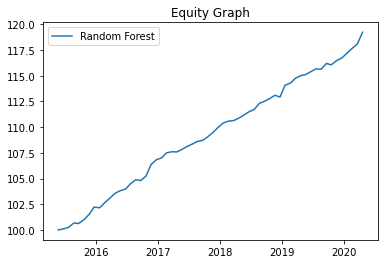

In [53]:
#latest equity in for loop?
plt.plot(timestamps, RF_equity, label = "Random Forest")
plt.title("Equity Graph")
plt.legend()
plt.show();


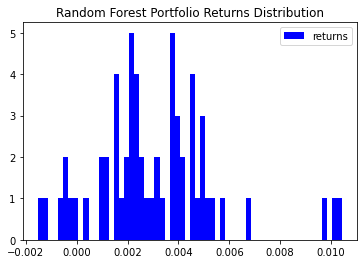

In [54]:
#latest scipy returns
plt.hist(RF_scipy_returns, bins = 60, label = 'returns', alpha = 1, color = 'blue') 
plt.title("Random Forest Portfolio Returns Distribution")
plt.legend()
plt.show();

In [55]:
#Obtain the most suitable portfolio from the pool.....
highest_equity = max(Equity_perportfolio)
portfolio_index = Equity_perportfolio.index(highest_equity)
#print(potential_portfolio) 
Best_portfolio =  Portfolio_sequence[portfolio_index]
print("Selected stocks are: " , Best_portfolio)
print("With an equity of: " , highest_equity)


Selected stocks are:  ['KLAC', 'DPZ', 'CF', 'PPL', 'AMD']
With an equity of:  143.5129759543914


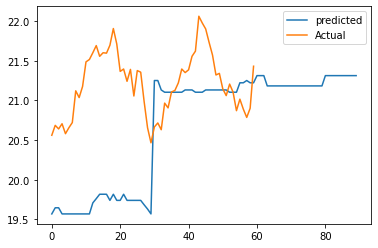

In [56]:

# Three different Prediction Windows-- time, lookback, forward, and stock_num
# Three different Prediction Windows
p1 , t1 = predict_prices(raw_df, df_closing, 60, 30, 30, 1)
p2 , t2 = predict_prices(raw_df, df_closing, 90, 30, 30, 1)
p3 , t3 = predict_prices(raw_df, df_closing, 120, 30, 30, 1)

predictions = np.concatenate([p1,p2,p3])
actuals = np.concatenate((t1,t2))

#This is a plt for the first 90 days of predictions for the first stock
plt.plot(predictions, label = 'predicted')
plt.plot(actuals, label = 'Actual')
plt.legend()
plt.show()

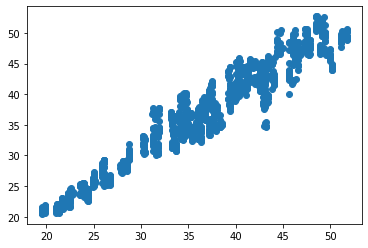

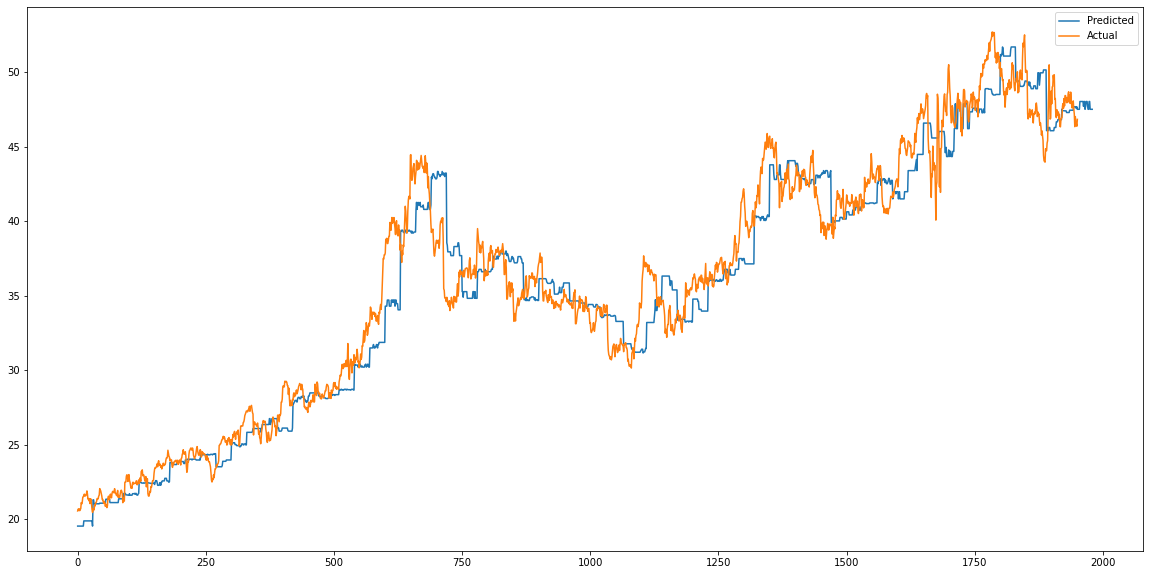

In [57]:
stock_predictions = []
stock_actuals = []

for i in range(60,df_closing.shape[0], 30):
  pred, act = predict_prices(raw_df, df_closing, i, 30, 30, 1)
  stock_predictions.append(pred)
  stock_actuals.append(act)

stock_predictions = np.concatenate(stock_predictions)
stock_actuals = np.concatenate(stock_actuals)

#Q-Q plot for predictions vs actuals
#print(stock_predictions.shape)
cap_point = len(stock_actuals)
plt.scatter(x = stock_predictions[:cap_point], y = stock_actuals)

#Full Prediction vs Actuals for the same stock
plt.figure(figsize=(20,10))
plt.plot(stock_predictions, label = 'Predicted')
plt.plot(stock_actuals, label = 'Actual')
plt.legend()
